# Signals and Systems for Dummies, Chapter 8

## Beat signal

In [44]:
import numpy as np
from scipy import signal, fft
import matplotlib.pyplot as plt
from matplotlib import rcParams
import math
# import mplcursors

# %matplotlib ipympl
%matplotlib inline

In [20]:
fc = 440
Tc = 1/fc
Ts = Tc/50

fmod = 5
Tmod = 1/5
d = 1*Tmod

t = np.linspace(0, d, np.round(d/Ts).astype("int"))

xmod = np.cos(2*np.pi*fmod*t)
x = np.cos(2*np.pi*fc*t)*xmod
# x = np.cos(2*np.pi*(fc+fmod)*t) + np.cos(2*np.pi*(fc-fmod)*t)

Text(0.5, 1.0, '440Hz x 5Hz')

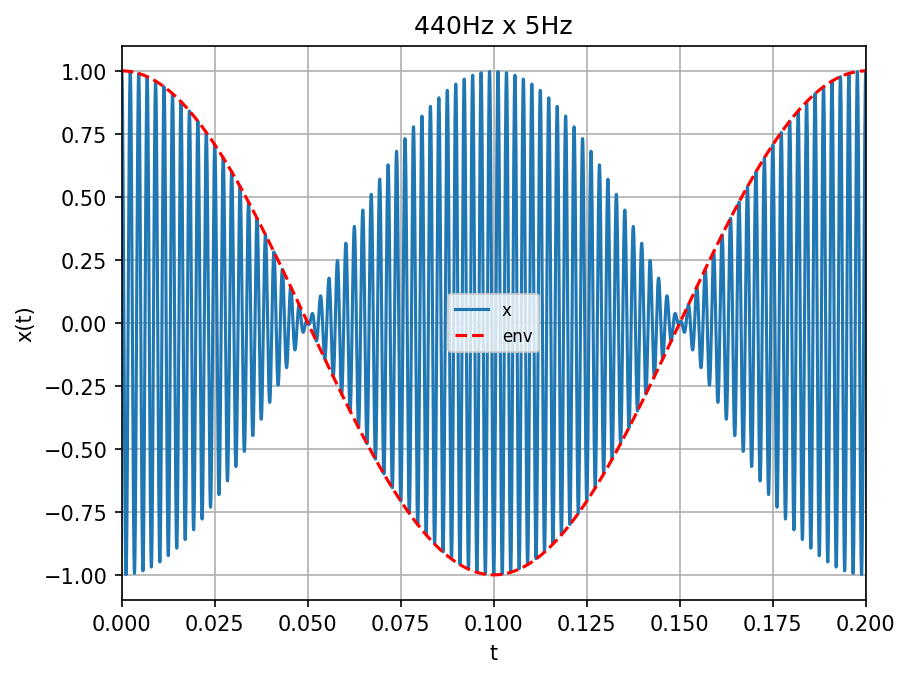

In [18]:
fig, ax = plt.subplots(dpi=150)
ax.plot(t, x, label="x")
ax.plot(t, xmod, 'r--', label="env")
# ax.plot(t, -xmod, 'r--')
ax.set_xlim(left=0, right=d)
ax.grid()
ax.legend(fontsize=8)
ax.set_ylabel("x(t)")
ax.set_xlabel("t")
ax.set_title("440Hz x 5Hz")

## Fourier series for pulse train/square wave

In [189]:
A = 1
fo = 1
To = 1/fo
tau = To/8
tau = To/2
# tau = To/100

sidelobe = 1/fo/tau
k = np.arange(np.floor(-7*sidelobe), np.floor(7*sidelobe+1))
k = np.arange(np.floor(-24*sidelobe), np.floor(24*sidelobe+1))
Xk = A*tau/To*np.sinc(k*fo*tau)*np.exp(-1j*np.pi*k*fo*tau)
f = k*fo

Text(0.5, 0.98, 'CT Rectangular Pulse Train, fo=1, tau=0.5')

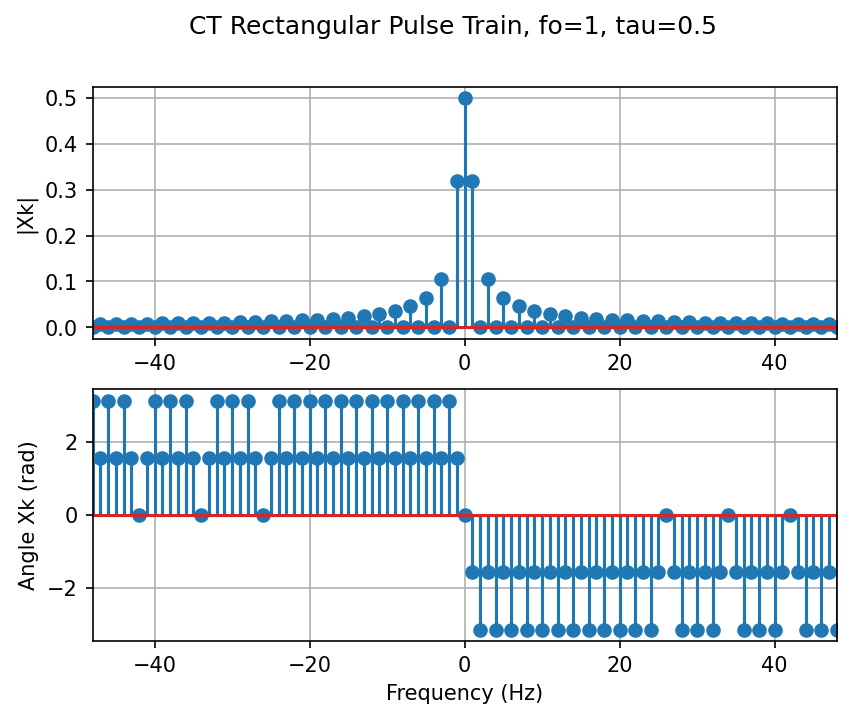

In [190]:
fig, axs = plt.subplots(nrows=2, sharex=True, dpi=150)
axs[0].stem(f, np.abs(Xk))
axs[0].set_ylabel("|Xk|")
# axs[0].set_xlabel("Frequency (Hz)")
axs[0].tick_params(labelbottom=True)
axs[0].grid()
axs[1].stem(f, np.angle(Xk))
# axs[1].set_ylim(bottom=-np.pi, top=np.pi)
axs[1].set_xlim(left=f.min(), right=f.max())
axs[1].set_ylabel("Angle Xk (rad)")
axs[1].set_xlabel("Frequency (Hz)")
axs[1].grid()
fig.suptitle(f"CT Rectangular Pulse Train, fo={fo}, tau={tau}")

### Reconstruction

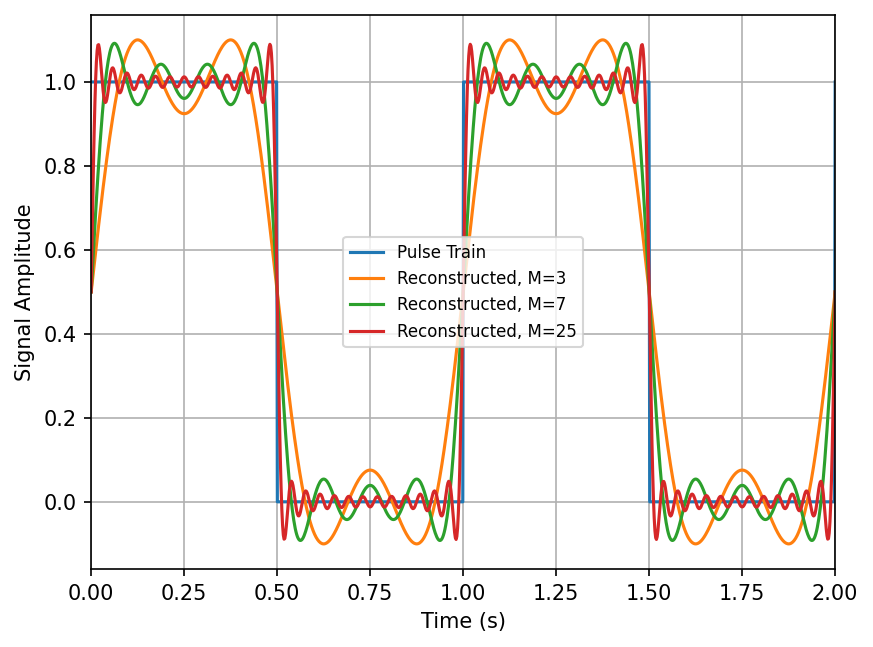

In [195]:
fig, ax = plt.subplots(dpi=150)
ax.plot(t, x, label="Pulse Train")

orders = [3, 7, 25]

t = np.linspace(0, 2*To, 1000)
x = A*(np.mod(t, To) <= tau)

for o in orders:
    i = (k >= -o) & (k <= o)
    kr = k[i]
    Xr = Xk[i]
    kr_mat = np.tile(kr[np.newaxis, :], [len(t), 1])
    t_mat = np.tile(t[:, np.newaxis], [1, len(kr)])
    cmplx_sins = np.exp(1j*2*np.pi*kr_mat*fo*t_mat)
    Xr = Xr[:, np.newaxis]
    xr = (cmplx_sins @ Xr).real
    ax.plot(t, xr.real, label=f"Reconstructed, M={o}")

ax.set_xlim(left=0, right=t.max())
ax.set_xlabel("Time (s)")
ax.set_ylabel("Signal Amplitude")
ax.grid()
ax.legend(fontsize=8)